<a href="https://colab.research.google.com/github/romajoshi17/CNN-Basics-with-PyTorch/blob/main/CNN_PyTroch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN

#### Importing all the necessary libraries and the dataset

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms

In [ ]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

100%|██████████| 170M/170M [00:02<00:00, 83.4MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
classes = trainset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

#### Loading the dataset batch-wise

In [ ]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True
)

In [ ]:
images, labels = next(iter(trainloader))
images.shape

torch.Size([4, 3, 32, 32])

In [ ]:
labels

tensor([7, 3, 9, 9])

#### Visualization

In [ ]:
def imshow(img):
    img = np.transpose(img, (1, 2, 0))
    plt.figure(figsize=(5, 5))
    plt.imshow(img)

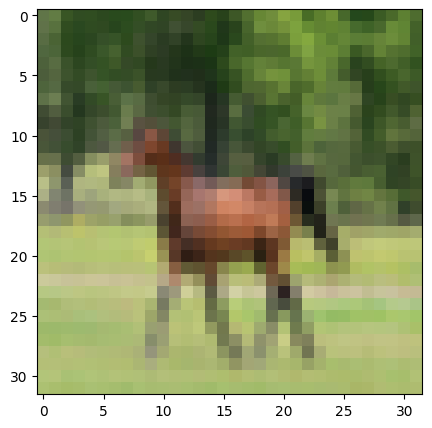

In [ ]:
img = images[0]
imshow(img)

In [ ]:
#npimg = img.numpy()
#plt.imshow(np.transpose(npimg, (1, 2, 0)))

horse
cat
truck
truck


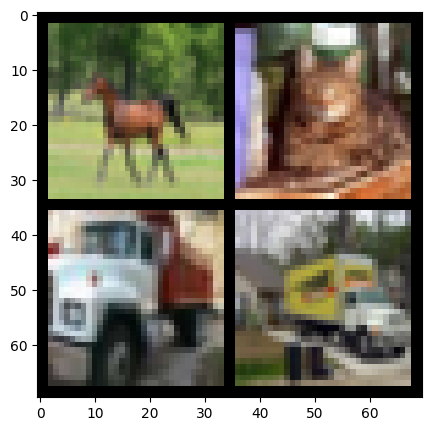

In [ ]:
imshow(torchvision.utils.make_grid(images, nrow=2))
for i in range(4):
  print(classes[labels[i]])

#### Single CNN

In [ ]:
import torch.nn as nn

In [ ]:
class SingleCNN(nn.Module):
  def __init__(self):
    super(SingleCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 16, 3)
    # no. of faature maps in input, no.of fature maps in output, kernel size


  def forward(self,x):
    return self.conv1(x)

In [ ]:
net = SingleCNN()
out = net(images)
out.shape

torch.Size([4, 16, 30, 30])

In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


#### What the kernel has learnt?

In [ ]:
first_out = out[0,0,:,:] #first image, first feature map, all rows and columns
first_out.shape

torch.Size([30, 30])

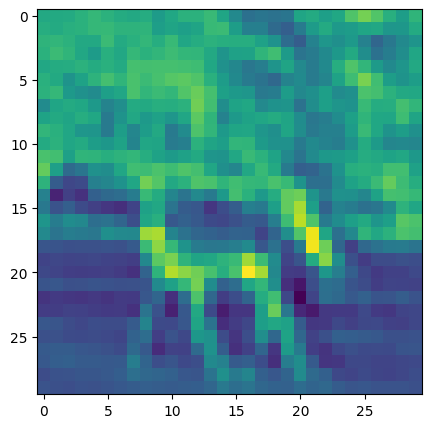

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(first_out.detach())
plt.show()

#### Deep CNN

In [ ]:
class DeepCNN(nn.Module):

  def __init__(self):
    super(DeepCNN, self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3, 16, 3), #(N,16,30,30)
        nn.AvgPool2d(2, stride=2), #(N,16,15,15)
        nn.Conv2d(16, 32, 3), #(N,32,13,13)
    )

  def forward(self,x):
    return self.model(x)

In [ ]:
net = DeepCNN()
out = net(images)
out.shape

torch.Size([4, 32, 13, 13])

In [ ]:
first_out = out[0,0,:,:] #first image, first feature map, all rows and columns
first_out.shape

torch.Size([13, 13])

In [ ]:
for param in net.parameters():
  print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])
torch.Size([32, 16, 3, 3])
torch.Size([32])


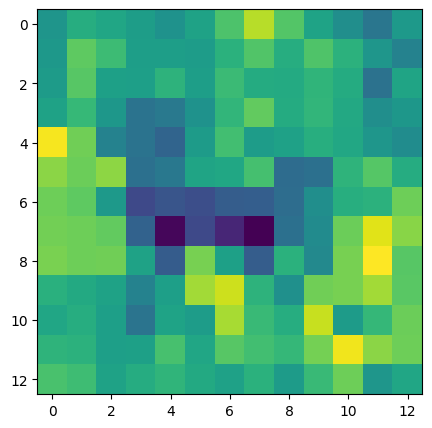

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(first_out.detach())
plt.show()

In [ ]:
class LeNet(nn.Module):

  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3, 6, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2),
        nn.Conv2d(6, 16, 5),
        nn.Tanh(),
        nn.AvgPool2d(2, stride=2)
    )
    self.fc_model = nn.Sequential(
        nn.Linear(16*5*5, 120),
        nn.Tanh(),
        nn.Linear(120, 84),
        nn.Tanh(),
        nn.Linear(84, 10)
    )

  def forward(self,x):
    print(x.shape)
    x = self.cnn_model(x)
    x = x.view(x.size(0), -1)
    x = self.fc_model(x)
    print(x.shape)
    return x

In [ ]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 10])


In [ ]:
torch.max(out.data,1)

torch.return_types.max(
values=tensor([0.0933, 0.0900, 0.0880, 0.1096]),
indices=tensor([7, 7, 7, 7]))